# 결정트리(Decision Trees)

# [Prediction of H1N1 vaccination](https://www.kaggle.com/c/prediction-of-h1n1-vaccination), 캐글대회사이트

원본 데이터와 다름

# H1N1 데이터를 가져와 분리해 보자

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

### train_labels 에는 두 타겟이 있는데 지금은 vacc_h1n1_f만 사용.

In [ ]:
target = 'vacc_h1n1_f'
# target = 'vacc_seas_f'
train = pd.merge(pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv'), 
                 pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv')[target], left_index=True, right_index=True)
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/test.csv')
sample_submission = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/submission.csv')

### 데이터를 간단히 살펴보자

In [ ]:
train.head().T

,0,1,2,3,4
h1n1_concern,NaN,3.0,2.0,2.0,1.0
h1n1_knowledge,NaN,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,NaN,0.0,0.0,1.0,0.0
behavioral_avoidance,NaN,0.0,1.0,1.0,1.0
behavioral_face_mask,NaN,0.0,0.0,0.0,0.0
behavioral_wash_hands,NaN,1.0,1.0,1.0,1.0
behavioral_large_gatherings,NaN,0.0,1.0,0.0,0.0
behavioral_outside_home,NaN,0.0,0.0,0.0,0.0
behavioral_touch_face,NaN,1.0,1.0,0.0,1.0
doctor_recc_h1n1,0.0,0.0,0.0,0.0,0.0


In [ ]:
train.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_insurance               float64
health_worker                  float64
opinion_h1n1_vacc_effective     object
opinion_h1n1_risk               object
opinion_h1n1_sick_from_vacc     object
opinion_seas_vacc_effective     object
opinion_seas_risk               object
opinion_seas_sick_from_vacc     object
agegrp                          object
education_comp                 float64
raceeth4_i                       int64
sex_i                            int64
inc_pov                  

설문조사 데이터이기 때문에 상대적으로 많은 정제가 필요할것 같지 않다.

#### 훈련데이터를 훈련/검증 세트로 나누어보자

In [ ]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)


train.shape, val.shape, test.shape

((33723, 39), (8431, 39), (28104, 38))

### 타겟의 비율을 살펴보자

In [ ]:
train[target].value_counts(normalize=True)

0    0.760935
1    0.239065
Name: vacc_h1n1_f, dtype: float64

클래스가 2개(0, 1)인 분류 문제이다.   
가장 큰 범주(0)가 76.15%를 차지하고 있다.   
클래스가 불균형(imbalanced)한 분류 문제로 보아야 함.  

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Warning의 대부분이 결측치에 대한 것으로 후에 Imputer를 사용하여 처리하면 될 것 같다.

### 실수형(float) 타입이 많이 있었는데 리포트에는 실수형이 거의 없는것 같다. 실수형 타입을 살펴보자.

In [ ]:
train.select_dtypes('float').head(20).T

,20365,29138,36128,39793,32973,31450,17541,33946,5300,34292,19463,9609,34149,30019,22287,14807,4945,26695,9029,18078
h1n1_concern,1.0,1.0,2.0,2.0,0.0,0.0,3.0,2.0,2.0,3.0,2.0,1.0,3.0,2.0,2.0,3.0,0.0,NaN,2.0,0.0
h1n1_knowledge,1.0,1.0,2.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,NaN,1.0,2.0
behavioral_antiviral_meds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
behavioral_avoidance,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,1.0,1.0
behavioral_face_mask,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0
behavioral_wash_hands,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN,1.0,1.0
behavioral_large_gatherings,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,1.0,1.0
behavioral_outside_home,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,1.0,1.0
behavioral_touch_face,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
doctor_recc_h1n1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


dtypes로 확인했을 때 실수형 타입으로 보이는 특성들이 대부분 범주형, 이진형 타입으로 보인다. 실제로 설문조사에 실수를 넣는 항은 전혀 없는 상황이다.

### 혹시 중복된 특성이 있나 찾아보자.

In [ ]:
train.T.duplicated()

h1n1_concern                   False
h1n1_knowledge                 False
behavioral_antiviral_meds      False
behavioral_avoidance           False
behavioral_face_mask           False
behavioral_wash_hands          False
behavioral_large_gatherings    False
behavioral_outside_home        False
behavioral_touch_face          False
doctor_recc_h1n1               False
doctor_recc_seasonal           False
chronic_med_condition          False
child_under_6_months           False
health_insurance               False
health_worker                  False
opinion_h1n1_vacc_effective    False
opinion_h1n1_risk              False
opinion_h1n1_sick_from_vacc    False
opinion_seas_vacc_effective    False
opinion_seas_risk              False
opinion_seas_sick_from_vacc    False
agegrp                         False
education_comp                 False
raceeth4_i                     False
sex_i                          False
inc_pov                        False
marital                        False
r

### 결측치 외에 중복된 특성도 없고 대부분 범주형 변수로 이상치도 없는것 같다. 
### 데이터 클리닝을 따로 할 필요가 별로 없어 보인다.

### 혹시 너무 많은 범주를 가지는 카테고리 특성들이 있는지 카디널리티(cardinality)를 확인해 보자.

In [ ]:
train.describe(exclude='number')

,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,agegrp,employment_status,census_msa,employment_industry,employment_occupation,state
count,26637,26602,26568,26519,26466,26413,33723,25466,33723,13714,13714,33723
unique,6,6,6,6,6,6,7,3,3,23,25,51
top,Somewhat Effective,Somewhat Low,Not Very Worried,Somewhat Effective,Somewhat Low,Not At All Worried,65+ Years,Employed,"MSA, Not Principle City",Health Care and Social Assistance Industries,Management Occupations,CALIFORNIA
freq,11710,9980,9229,11571,9057,11813,6821,13722,15202,2451,1769,829


In [ ]:
train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
employment_status,25466,3,Employed,13722
census_msa,33723,3,"MSA, Not Principle City",15202
opinion_h1n1_vacc_effective,26637,6,Somewhat Effective,11710
opinion_h1n1_risk,26602,6,Somewhat Low,9980
opinion_h1n1_sick_from_vacc,26568,6,Not Very Worried,9229
opinion_seas_vacc_effective,26519,6,Somewhat Effective,11571
opinion_seas_risk,26466,6,Somewhat Low,9057
opinion_seas_sick_from_vacc,26413,6,Not At All Worried,11813
agegrp,33723,7,65+ Years,6821
employment_industry,13714,23,Health Care and Social Assistance Industries,2451


state를 제외하고는 카디널리티가 그리 높지 않다. 높은 카디널리티를 가지는 특성은 후에 약간 조정을 해주겠다.
### 카테고리를 많이 가지는 특성들의 범주를 살펴보자.

In [ ]:
train['employment_occupation'].value_counts()

Management Occupations                                       1769
Office and Administrative Support Occupations                1556
Education, Training, and Library Occupations                 1286
Healthcare Practitioners and Technical Occupations           1200
Sales and Related Occupations                                1108
Business and Financial Operations Occupations                 764
Construction and Extraction Occupations                       538
Production Occupations                                        483
Transportation and Material Moving Occupations                483
Computer and Mathematical Occupations                         475
Food Preparation and Serving Related Occupations              405
Architecture and Engineering Occupations                      367
Arts, Design, Entertainment, Sports and Media Occupations     366
Personal Care and Service Occupations                         353
Community and Social Services Occupations                     335
Building a

## 특성을 엔지니어링 해보자. 이부분에서 아이디어를 여러가지 실험해 볼 수 있다.

In [ ]:
import numpy as np

def engineer(df):
    """특성을 엔지니어링 하는 함수입니다."""
    
    # 높은 카디널리티를 가지는 특성을 제거한다.
    selected_cols = df.select_dtypes(include=['number', 'object'])
    labels = selected_cols.nunique() # 특성별 카디널리티 리스트
    selected_features = labels[labels <= 30].index.tolist() # 카디널리티가 30보다 작은 특성만 선택한다.
    df = df[selected_features]
    
    # 새로운 특성을 생성한다.
    behaviorals = [col for col in df.columns if 'behavioral' in col] 
    df['behaviorals'] = df[behaviorals].sum(axis=1)
    
    
    dels = [col for col in df.columns if ('employment' in col or 'seas' in col)]
    df.drop(columns=dels, inplace=True)
        
    return df


train = engineer(train)
val = engineer(val)
test = engineer(test)

### 데이터에서 타겟과 특성을 분리한다.

In [ ]:
features = train.drop(columns=[target]).columns

### 훈련/검증/테스트 데이터를 특성과 타겟으로 분리한다.

In [ ]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

## 사이킷럿 파이프라인(Pipelines)에 대해 배워보자.

이전부터 모델을 만들때 진행했던 결측치 처리, 스케일링, 모델학습 등 머신러닝 프로세스에서

파이프라인(Pipelines)을 사용하면 중복 코드를 최소화여 쉽게 연결할 수 있다.

[Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

파이프라인을 통해 쉽게
- 여러 ML 모델을 같은 전처리 프로세스에 연결시킬 수 있다.
- 그리드서치(grid search)를 통해 여러 하이퍼파라미터를 쉽게 연결할 수 있다.

### 로지스틱회귀 학습이 파이프라인 유/무에 따라 어떻게 다른지 확인해 보자.

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [ ]:
enc = OneHotEncoder()
imp_mean = SimpleImputer()
scaler = StandardScaler()
model_lr = LogisticRegression(n_jobs=-1)

X_train_encoded = enc.fit_transform(X_train)
X_train_imputed = imp_mean.fit_transform(X_train_encoded)
X_train_scaled = scaler.fit_transform(X_train_imputed)
model_lr.fit(X_train_scaled, y_train)

X_val_encoded = enc.transform(X_val)
X_val_imputed = imp_mean.transform(X_val_encoded)
X_val_scaled = scaler.transform(X_val_imputed)

# score method: Return the mean accuracy on the given test data and labels
print('검증세트 정확도', model_lr.score(X_val_scaled, y_val))

X_test_encoded = enc.transform(X_test)
X_test_imputed = imp_mean.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)

y_pred = model_lr.predict(X_test_scaled)

검증세트 정확도 0.8185268651405527


### 이번에는 파이프라인을 사용해서 똑같은 작업을 해 보자. 코드가 간결해지고 가독성이 증가한다!

In [ ]:
pipe = make_pipeline(
    OneHotEncoder(), 
    SimpleImputer(), 
    StandardScaler(), 
    LogisticRegression(n_jobs=-1)
)
pipe.fit(X_train, y_train)

print('검증세트 정확도', pipe.score(X_val, y_val))

y_pred = pipe.predict(X_test)

검증세트 정확도 0.8185268651405527


### 파이프라인에서 모델의 파라미터 등과 같은 정보를 확인하는 방식을 살펴 보자.
[6.1.1.1.2. Accessing steps](https://scikit-learn.org/stable/modules/compose.html#accessing-steps):

`named_steps` 속성을 사용해서 파이프라인의 각 스텝에 접근이 가능하다.

In [ ]:
pipe.named_steps

{'onehotencoder': OneHotEncoder(cols=['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
                     'opinion_h1n1_sick_from_vacc', 'agegrp', 'census_msa']),
 'simpleimputer': SimpleImputer(),
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(n_jobs=-1)}

`named_steps` 은 유사 딕셔너리 객체(dictionary-like object)로 파이프라인 내 과정에 접근 가능하도록 한다.

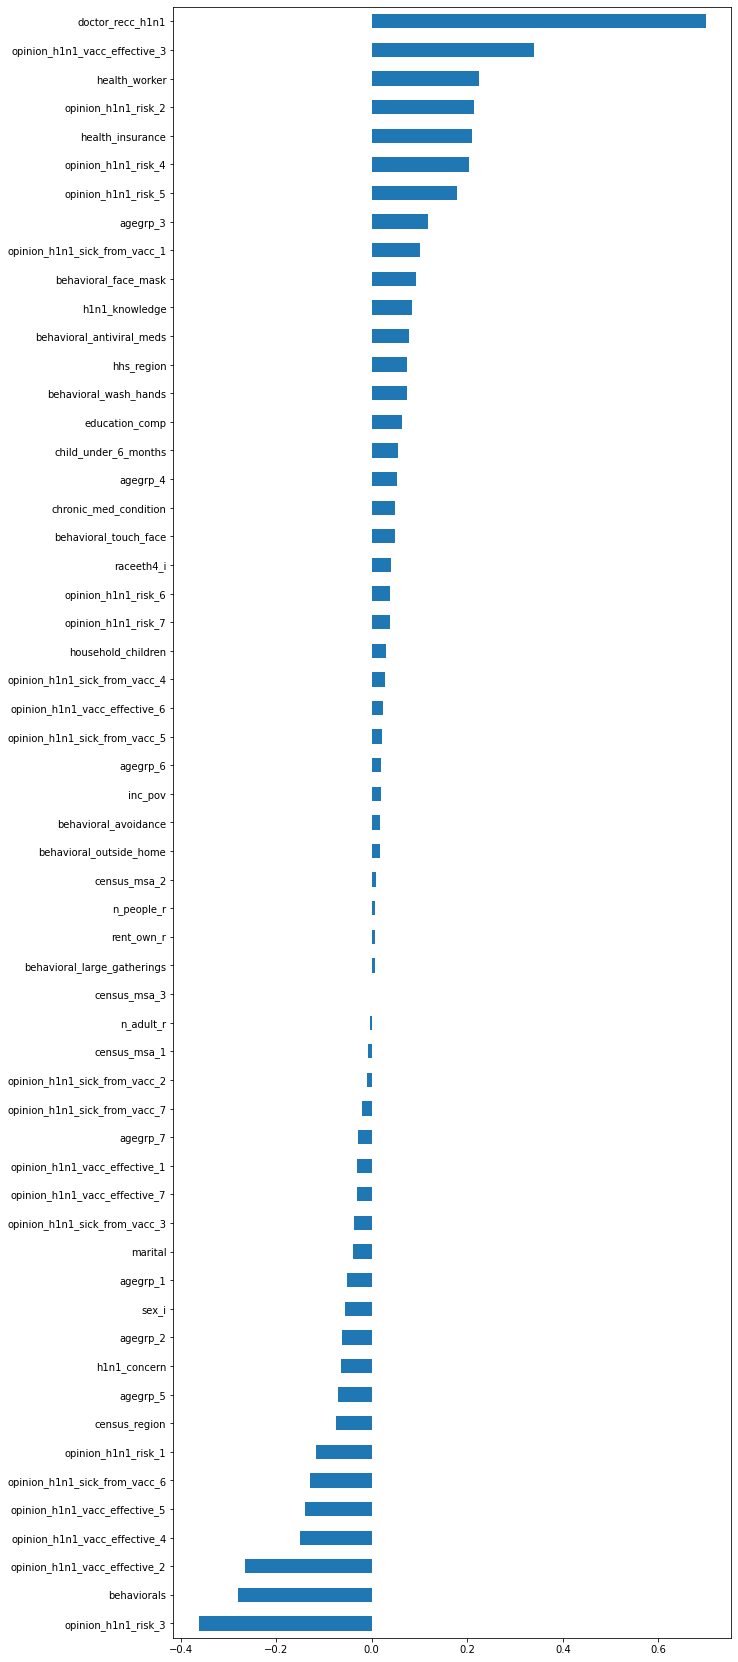

In [ ]:
import matplotlib.pyplot as plt

model_lr = pipe.named_steps['logisticregression']
enc = pipe.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val).columns
coefficients = pd.Series(model_lr.coef_[0], encoded_columns)
plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh();

## 결정트리(Decision Tree) 모델을 살펴보자.

앞서 우리는 선형모델을 배웠다. 이번에는 좀 다른 특성을 가진 트리기반(tree-based) 머신러닝모델을 공부해 보겠다.

다음 링크에서 결정트리에 대해 확인해 보세요!
[Decision Trees](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)

결정트리(의사결정나무) 모델은 특성들을 기준으로 샘플을 분류해 나가는데 그 형태가 나무의 가지가 뻗어나가는 모습과 비슷해서 결정트리라는 이름을 가지고 있습니다. 마치 스무고개를 하는 것과 같이 특성들의 수치를 가지고 질문을 통해 정답 클래스를 찾아가는 과정으로 보시면 될 것 같습니다. 여기서 질문이나 말단의 정답을 **노드(node)** 라 하며 노드를 연결하는 선을 **엣지(edge)** 라 합니다.

<img src="https://upload.wikimedia.org/wikipedia/commons/f/fe/CART_tree_titanic_survivors_KOR.png" width="600" />

- 결정트리의 각 노드(node)는 **뿌리(root)**노드, **중간(internal)**노드, **말단(external, leaf, terminal)** 노드로 나뉠 수 있다.
- 결정트리는 분류와 회귀문제 모두 적용 가능하다.
- 결정트리는 데이터를 분할해 가는 알고리즘이다.
- 분류 과정은 새로운 데이터가 특정 말단 노드에 속한다는 정보를 확인한 뒤 말단노드의 빈도가 가장 높은 범주로 데이터를 분류한다.
- 결정트리는 분류과정을 트리구조로 직관적으로 확인이 가능한 장점이 있다.

### 결정트리 학습 알고리즘
결정트리를 학습하는 것은 노드를 어떻게 분할하는가에 대한 문제이다. 노드 분할 방법에 따라 다른 모양의 트리구조가 만들어지게 될 것이다.
결정트리의 비용함수를 정의하고 그것을 최소화 하도록 분할하는 것이 트리모델 학습 알고리즘이 되겠다.

트리학습에 자주 쓰이는 비용함수 중 지니불순도와 엔트로피에 대해서 알아보자.

**▪︎ 지니불순도(Gini Impurity or Gini Index):**

${\displaystyle {I}_{G}(p)=\sum _{i=1}^{J}p_{i}(1-p_{i})=1-\sum _{i=1}^{J}{p_{i}}^{2}}$

**▪︎ 엔트로피(Entropy):**

${\displaystyle \mathrm {H} (T)=\operatorname {I} _{E}\left(p_{1},p_{2},...,p_{J}\right)=-\sum _{i=1}^{J}{p_{i}\log _{2}p_{i}}}$


여기서 **불순도(impurity)** 라는 개념은 여러 범주가 섞여 있는 정도를 이야기 한다. 예를들어 A, B 두 클래스가 혼합된 데이터가 있을 때 (A, B) 비율이 

- (45%, 55%)인 샘플(두 범주 수가 비슷)은 불순도가 높은 것이며
- (80%, 20%)인 샘플이 있다면 상대적으로 위의 상태보다 불순도가 낮은 것 이다.(순수도(purity)는 높음)



지니불순도나 엔트로피는 위의 불순도 개념에서 보면 된다. 불순도가 낮은경우 지니불순도나 엔트로피는 낮은값을 가지게 된다. 결국 노드를 분할하는 시점에서 가장 비용함수를 줄이는 분할특성과 분할지점을 찾아 내는 프로세스가 필요하다.

- 분할에 사용할 특성이나 분할지점(값)은 타겟변수를 가장 잘 구별해 주는(불순도의 감소가 최대가 되는, 정보획득이 가장 큰)것을 선택한다.

- 정보획득(Information Gain)은 특정한 특성을 사용해 분할했을 때 엔트로피의 감소량을 뜻한다.
${\displaystyle IG(T,a)=\mathrm {H} {(T)}-\mathrm {H} {(T|a)}}$ = 분할전 노드 불순도 - 분할 후 자식노드 들의 불순도

<img src="https://i.imgur.com/pDvAKOX.png" width="700"/>

### 사이킷런 DesicionTreeClassifier 를 사용해 결정트리를 구현해 보겠다.

[sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

파이프라인을 사용하면 위에서 본 코드에서 단지 분류기만 바꾸어 주면 된다!
그리고 결정트리에서는 StandardScaler는 도움이 되지 않기 때문에 제외하고 학습하겠다.

In [22]:
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=1, criterion='entropy')
)

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_val, y_val))

훈련 정확도:  0.9908667674880646
검증 정확도:  0.7572055509429486


In [23]:
y_val.value_counts(normalize=True)

0    0.761001
1    0.238999
Name: vacc_h1n1_f, dtype: float64

#### 학습데이터는 99% 이상 맞추면서 검증세트의 정확도는 다수범주(0)의 비율과 같게 나오는 것을 확인할 수 있다.

확실한 `과적합`임을 확인할 수 있다. 대부분 0으로 예측한 것 같다. 다수 범주로 예측하는 모델이 기준모델이라고 보면, 기준모델과 동일한 성능이 나오므로 학습이 잘 되었다고 판단할 수 없겠다.

#### 만들어진 트리를 확인해 보겠다.
거대한 트리는 한 눈에 관찰하기 어렵기 때문에 depth 제한을 3으로 두고 결정트리를 그려보겠다.

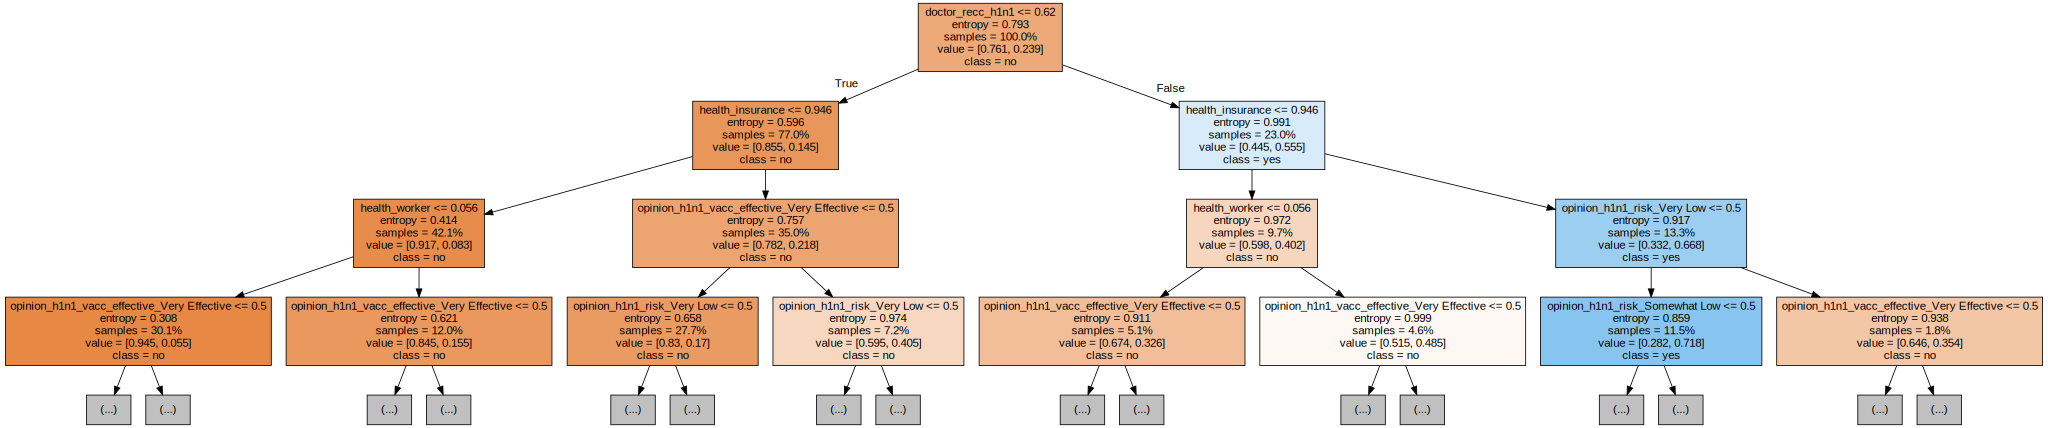

In [24]:
# graphviz 설치방법: conda install -c conda-forge python-graphviz
import graphviz
from sklearn.tree import export_graphviz

model_dt = pipe.named_steps['decisiontreeclassifier']
enc = pipe.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val).columns

dot_data = export_graphviz(model_dt
                          , max_depth=3
                          , feature_names=encoded_columns
                          , class_names=['no', 'yes']
                          , filled=True
                          , proportion=True)


display(graphviz.Source(dot_data))

### 과적합을 해결해 봅시다.
복잡한 트리는 과적합 가능성을 높이기 때문에 복잡도를 낮추어 일반화를 유도한다.

#### 다음은 트리의 복잡도를 줄이기 위해 자주 사용하는 하이퍼파라미터들이다.
- min_samples_split
- min_samples_leaf
- max_depth

[sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

`min_samples_leaf`를 사용하하면 말단 노드(external node)에 최소한 존재해야 하는 샘플들의 수를 정해줄 수 있다.

과적합을 줄이는지 확인해 봅시다.

In [25]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(min_samples_leaf=10, random_state=2)
)

pipe.fit(X_train, y_train)
print('훈련 정확도', pipe.score(X_train, y_train))
print('검증 정확도', pipe.score(X_val, y_val))

훈련 정확도 0.8577528689618361
검증 정확도 0.8029889692800379


비슷한 방법으로 `max_depth`를 제한해 봅시다.

In [26]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=6, random_state=2)
)

pipe.fit(X_train, y_train)
print('훈련 정확도', pipe.score(X_train, y_train))
print('검증 정확도', pipe.score(X_val, y_val))

훈련 정확도 0.8283367434688491
검증 정확도 0.8269481674771676


### 이번에는 결정트리에서 확인 가능한 특성중요도(feature importance)에 대해 알아보겠다.

선형모델에서는 특성과 타겟의 관계를 확인하기 위해 회귀 계수(coefficients)를 살펴보았다. 하지만 결정트리에서는 대신 특성중요도를 확인할 수 있다. 회귀계수와 달리 특성중요도는 항상 양수값을 가진다. 이 값을 통해 특성이 얼마나 일찍 그리고 자주 분기에 사용되는지 결정된다.

In [27]:
model_dt = pipe.named_steps['decisiontreeclassifier']

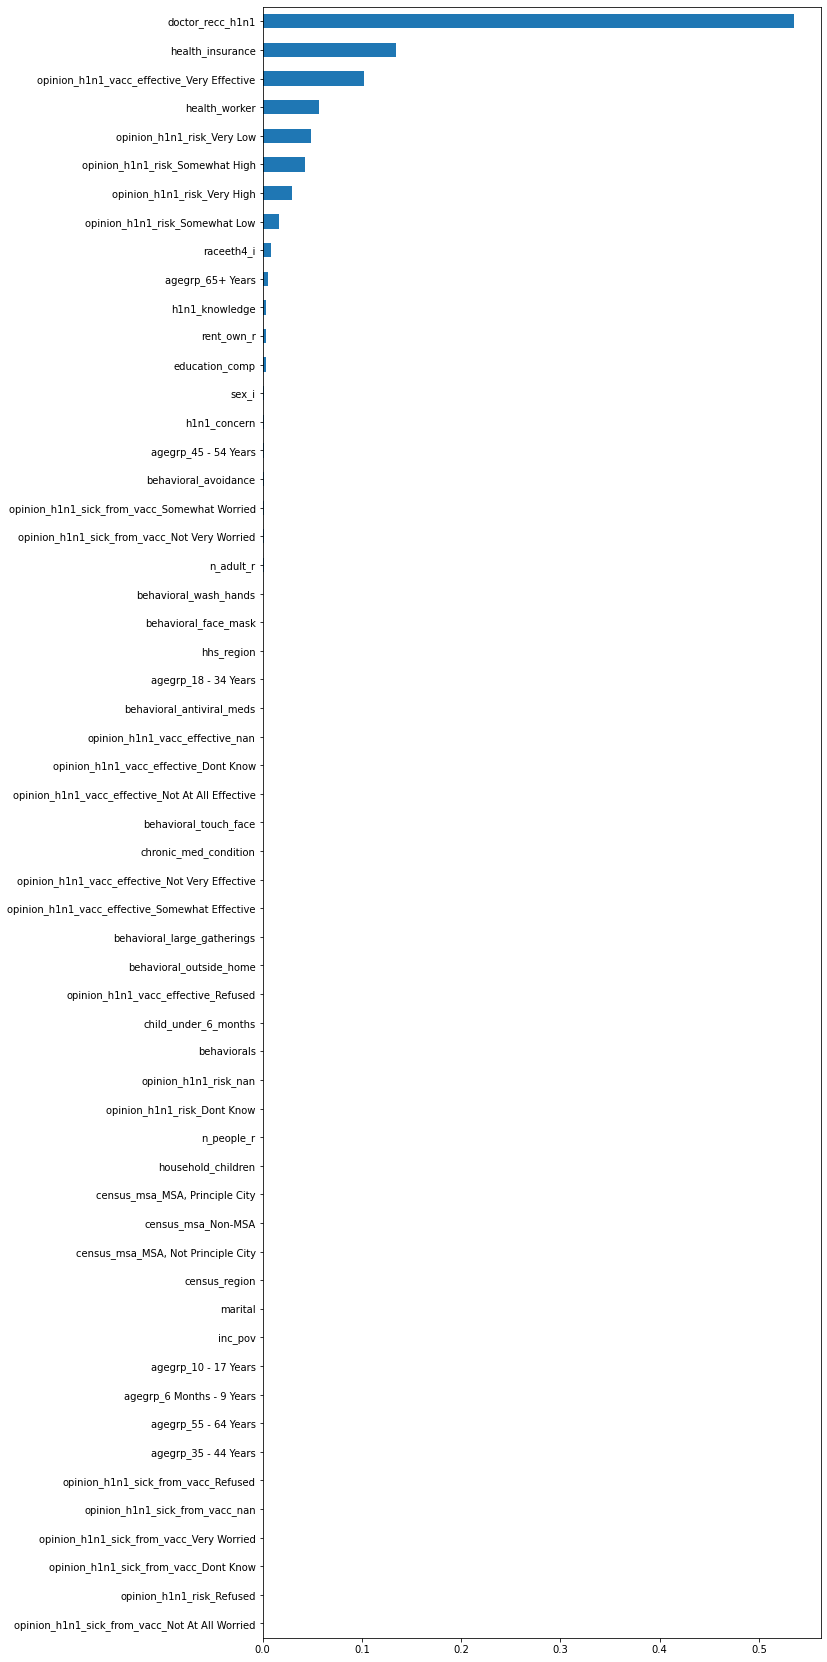

In [28]:
importances = pd.Series(model_dt.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh();

#### 결정트리모델은 선형모델과 달리 비선형, 비단조(non-monotonic), 특성상호작용(feature interactions) 특징을 가지고 있는 데이터 분석에 용의하다.

<img src="https://www.statisticshowto.com/wp-content/uploads/2017/03/monotonic-relationship.png" />

- 단조(Monotonic), 비단조(Non-monotonic) 함수
    - [Monotonic function](https://en.wikipedia.org/wiki/Monotonic_function)


- 특성상호작용
    - 특성상호작용은 특성들끼리 서로 상호작용을 하는 경우를 말한다. 회귀분석에서는 서로 상호작용이 높은 특성들이 있으면 개별 계수를 해석하는데 어려움이 있고 학습이 올바르게 되지 않을 수 있다. 하지만 트리모델은 이런 상호작용을 자동으로 걸러내는 특징이 있다.


## 특성상호작용에 대해서 알아보겠습니다.
간단한 예제 데이터로 특성상호작용을 만들어 선형회귀모델과 트리모델의 차이를 살펴보겠다.

이 예제는 두 특성으로 집값을 맞추는 문제이며 특성간 상호작용이 없는 데이터 이다

[5.4.1 Feature Interaction?](https://christophm.github.io/interpretable-ml-book/interaction.html#feature-interaction)

- 기본가격 150,000 

Location 
- good: +50,000
- bad: 0

Size
- big: +100,000
- small: 0

<img src="https://i.imgur.com/CfBOqv4.png" width="600" />


good and big 인 경우 +100,000 규칙 추가(특성상호작용)

<img src="https://i.imgur.com/KmneDj6.png" width="600" />



In [29]:
cols = ['location','size','price']
# location: 1:good, 0:bad
# size: 1:big, 0:small
# big은 small보다 100,000 비싸고, good은 bad보다 50,000 가격이 더 나간다.
features = [[1, 1], 
            [1, 0], 
            [0, 1], 
            [0, 0]]

price = [[300000], 
        [200000], 
        [250000], 
        [150000]]

X_house = pd.DataFrame(columns=cols[:2], data=features)
y_house = pd.DataFrame(columns=[cols[2]], data=price)

선형회귀 모델을 만들어 봅시다.

In [30]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_house, y_house)
print('R2: ', linear.score(X_house, y_house))
print('Intercept: ', linear.intercept_[0])
print('Coefficients')
pd.DataFrame(columns=cols[:2], data=linear.coef_)

R2:  1.0
Intercept:  150000.0
Coefficients


,location,size
0,50000.0,100000.0


회귀트리를 만들어 비교해 봅시다

In [31]:
import graphviz
## jupyterlab 사용시: jupyter labextension install @jupyter-widgets/jupyterlab-manager
from ipywidgets import interact
from sklearn.tree import DecisionTreeRegressor, export_graphviz

# 트리구조 그리는 함수
def show_tree(tree, colnames):
    dot = export_graphviz(tree, feature_names=colnames, filled=True, rounded=True)   
    return graphviz.Source(dot)

R2 1.0


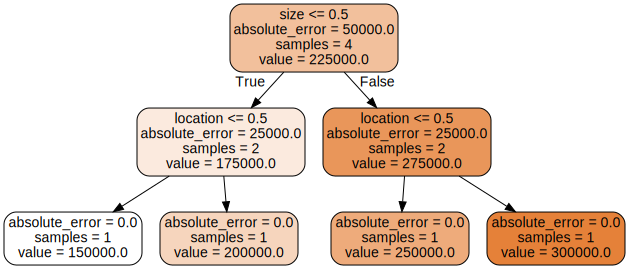

In [33]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(criterion="absolute_error")
tree.fit(X_house, y_house)
print('R2', tree.score(X_house, y_house))
show_tree(tree, colnames=X_house.columns)

#### 데이터를 수정해서 특성상호작용(feature interaction)이 존재하도록 만들어 보고 트리를 만들어 보겠다.

In [34]:
y_house.loc[0, 'price'] = 400000
y_house

,price
0,400000
1,200000
2,250000
3,150000


In [35]:
linear = LinearRegression()
linear.fit(X_house, y_house)
print('R2: ', linear.score(X_house, y_house))
print('Intercept: ', linear.intercept_[0])
print('Coefficients')
pd.DataFrame(columns=cols[:2], data=linear.coef_)

R2:  0.9285714285714286
Intercept:  125000.0
Coefficients


,location,size
0,100000.0,150000.0


회귀트리를 만들어 비교해 봅시다.

R2 1.0


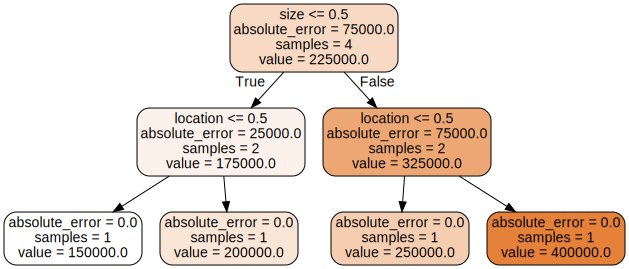

In [36]:
tree = DecisionTreeRegressor(criterion="absolute_error")
tree.fit(X_house, y_house)
print('R2', tree.score(X_house, y_house))
show_tree(tree, colnames=X_house.columns)

트리모델은 선형회귀모델과 달리 특성상호작용에도 문제없이 가격을 예측하는 것을 확인할 수 있다.

### 이번에는 결정트리를 비선형 회귀문제에 적용해 보도록 하겠다.
시각화를 해보기 위해서 하나의 특성만을 가지며 비선형 특징을 보이는 데이터를 사용해 회귀문제를 풀어보도록 하겠다.

[Thurber dataset](https://www.itl.nist.gov/div898/strd/nls/data/thurber.shtml)
- Nonlinear Least Squares Regression

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


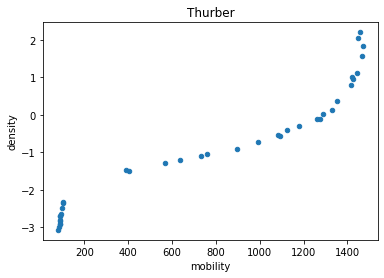

In [37]:
columns = ['mobility', 'density']
data = [[80.574, -3.067]
,[84.248, -2.981]
,[87.264, -2.921]
,[87.195, -2.912]
,[89.076, -2.84]
,[89.608, -2.797]
,[89.868, -2.702]
,[90.101, -2.699]
,[92.405, -2.633]
,[95.854, -2.481]
,[100.696, -2.363]
,[101.06, -2.322]
,[401.672, -1.501]
,[390.724, -1.46]
,[567.534, -1.274]
,[635.316, -1.212]
,[733.054, -1.1]
,[759.087, -1.046]
,[894.206, -0.915]
,[990.785, -0.714]
,[1090.109, -0.566]
,[1080.914, -0.545]
,[1122.643, -0.4]
,[1178.351, -0.309]
,[1260.531, -0.109]
,[1273.514, -0.103]
,[1288.339, 0.01]
,[1327.543, 0.119]
,[1353.863, 0.377]
,[1414.509, 0.79]
,[1425.208, 0.963]
,[1421.384, 1.006]
,[1442.962, 1.115]
,[1464.35, 1.572]
,[1468.705, 1.841]
,[1447.894, 2.047]
,[1457.628, 2.2]]

thurber = pd.DataFrame(columns=columns, data=data)

# 데이터를 시각화 한다.
thurber.plot('mobility', 'density', kind='scatter', title='Thurber');

선형회귀 모델을 만들어 성능을 확인해 봅시다.

R2:  0.9210137417351627


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


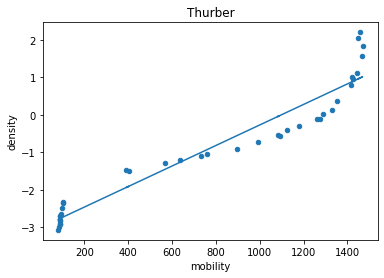

In [38]:
X_thurber = thurber[['mobility']]
y_thurber = thurber['density']
linear = LinearRegression()
linear.fit(X_thurber, y_thurber)
print('R2: ', linear.score(X_thurber, y_thurber))
ax = thurber.plot('mobility', 'density', kind='scatter', title='Thurber')
ax.plot(X_thurber, linear.predict(X_thurber));

이번에는 트리회귀모델을 만들어 봅시다
- [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

max_depth = 1인 경우는 선형회귀 보다 성능이 안 좋아 보이지만 max_depth를 더할 수록 선에 적합이 되어 비선형 데이터를 학습할 수 있음을 시각적으로 확인할 수 있다.

In [39]:
from ipywidgets import interact
from sklearn.tree import DecisionTreeRegressor, export_graphviz

def thurber_tree(max_depth=1):
    tree = DecisionTreeRegressor(max_depth=max_depth)
    tree.fit(X_thurber, y_thurber)
    print('R2: ', tree.score(X_thurber, y_thurber))
    ax = thurber.plot('mobility', 'density', kind='scatter', title='Thuber')
    ax.step(X_thurber, tree.predict(X_thurber), where='mid')
    plt.show()
    display(show_tree(tree, colnames=['mobility']))

interact(thurber_tree, max_depth=(1,6,1));

interactive(children=(IntSlider(value=1, description='max_depth', max=6, min=1), Output()), _dom_classes=('wid…

## 참고자료
- [Gini Impurity](https://www.data-stats.com/gini-impurity/)
- [Decision Tree Regressor explained in depth](https://gdcoder.com/decision-tree-regressor-explained-in-depth/)
- [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
- [5.4.1 Feature Interaction?](https://christophm.github.io/interpretable-ml-book/interaction.html#feature-interaction)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)
- [1.10.6. Tree algorithms: ID3, C4.5, C5.0 and CART
](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart)
- [Random Forests for Complete Beginners](https://victorzhou.com/blog/intro-to-random-forests/)

# Exercise

# Decision Trees(결정트리)

## 캐글 인클래스(InClass) Competitions

### 1) 대회 참여(Join) 및 데이터셋 준비

- [캐글 계정을 만드세요](https://www.kaggle.com/), 공유된 인클래스 대회 url을 통해 이동한 후 대회에 참여하세요.



In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [41]:
target = 'vacc_h1n1_f'
# target = 'vacc_seas_f'
train = pd.merge(pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv'), 
                 pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv')[target], left_index=True, right_index=True)
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/test.csv')
sample_submission = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/submission.csv')

In [42]:
train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,census_region,census_msa,n_adult_r,household_children,n_people_r,employment_industry,employment_occupation,hhs_region,state,vacc_h1n1_f
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,4,"MSA, Not Principle City",2.0,3.0,5.0,NaN,NaN,9,CALIFORNIA,0
1,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,"MSA, Principle City",1.0,0.0,1.0,Accommodation and Food Services Industries,Food Preparation and Serving Related Occupations,7,NEBRASKA,0
2,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,"MSA, Not Principle City",1.0,2.0,3.0,Transportation and Warehousing Industries,Transportation and Material Moving Occupations,1,MASSACHUSETTS,0
3,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3,"MSA, Not Principle City",2.0,2.0,4.0,"Professional, Scientific, and Technical Servic...",Legal Occupations,6,LOUISIANA,0
4,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,3,"MSA, Not Principle City",3.0,0.0,3.0,Education Services Industries,Office and Administrative Support Occupations,4,ALABAMA,1


In [43]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)


train.shape, val.shape, test.shape

((33723, 39), (8431, 39), (28104, 38))

In [44]:
train[target].value_counts(normalize=True)

0    0.760935
1    0.239065
Name: vacc_h1n1_f, dtype: float64

### 2) 데이터 EDA 및 특성공학 수행
- profiling을 사용하여 데이터를 살펴보고, missing value, zeros, cardinarity 등을 확인하여 처리하세요.
- 본인만의 특성공학을 수행하세요.


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [46]:
danger_state = pd.DataFrame(train['vacc_h1n1_f'].groupby(train['state']).sum())

In [47]:
# 주 별로 설문조사 샘플의 수가 많이 차이나는지 확인
sumstate = train.groupby(train['state']).size()

In [55]:
#!pip install -U pandas-profiling
#from pandas_profiling import ProfileReport
#profile = ProfileReport(train, minimal=True).to_notebook_iframe()
#train.describe(exclude='number').T.sort_values(by='unique')
#train = pd.merge(pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv'), 
#pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv')[target], left_index=True, right_index=True)
# 주 별로 타겟 응답자의 비율이 크게 차이나 특히 상황이 심각한 주가 있는지 확인
#plt.figure(figsize=(30,10))
#sns.barplot(data = danger_state, x = danger_state.index, y='vacc_h1n1_f')
#danger_state['ratio'].sort_values()

In [48]:
danger_state['ratio'] = danger_state['vacc_h1n1_f'] / sumstate.values * 100

In [49]:
train['state'].iloc[0]

'NEW JERSEY'

In [50]:
def engineer(df):
    """특성을 엔지니어링 하는 함수입니다."""
    
    # 높은 카디널리티를 가지는 특성을 제거합니다.
    #selected_cols = df.select_dtypes(include=['number', 'object'])
    #labels = selected_cols.nunique() # 특성별 카디널리티 리스트
    #selected_features = labels[labels <= 60].index.tolist() # 카디널리티가 30보다 작은 특성만 선택합니다.
    #df = df[selected_features]

    low = ['MISSISSIPPI', 'GEORGIA', 'MISSOURI', 'LOUISIANA', 'IDAHO', 'FLORIDA', 'ALABAMA']
    middle = ['OKLAHOMA', 'TEXAS', 'ALABAMA', 'MONTANA', 'NEW YORK','MICHIGAN', 'SOUTH CAROLINA', 'NEW JERSEY', 'OHIO', 'PENNSYLVANIA', 'TENNESSEE',
            'NEVADA', 'DELAWARE', 'CONNECTICUT', 'ILLINOIS', 'DISTRICTOF COLUMBIA', 'NEW MEXICO', 'NORTH CAROLINA', 'WEST VIRGINIA', 'OREGON', 'ALASKA', 'WISCONSIN',
            'CALIFORNIA', 'COLORADO','ARIZONA']
    high = ['INDIANA', 'MARYLAND', 'WYOMING', 'UTAH', 'ARKANSAS', 'KANSAS', 'WASHINGTON', 'NORTH DAKOTA', 'NEBRASKA', 'MINNESOTA', 'IOWA', 'VIRGINIA',
            'VERMONT', 'NEW HAMPSHIRE', 'HAWAII']
    extreme = ['MAINE', 'SOUTH DAKOTA', 'MASSACHUSETTS', 'RHODE ISLAND']

    df['danger_state_level'] = 0

    num = len(df)
    for i in range(num):
      if df['state'].iloc[i] in low:
        df['danger_state_level'].iloc[i] = 'low'

      elif df['state'].iloc[i] in middle:
        df['danger_state_level'].iloc[i] = 'middle'
      
      elif df['state'].iloc[i] in high:
        df['danger_state_level'].iloc[i] = 'high'

      else:
        df['danger_state_level'].iloc[i] = 'extreme'
    
    df.drop(['state'], axis = 1, inplace=True)

    # 새로운 특성을 생성합니다.
    behaviorals = [col for col in df.columns if 'behavioral' in col] 
    df['behaviorals'] = df[behaviorals].sum(axis=1)
    
    
    dels = [col for col in df.columns if ('employment' in col or 'seas' in col)]
    df.drop(columns=dels, inplace=True)
        
    return df


train = engineer(train)
val = engineer(val)
test = engineer(test)

<ipython-input-50-ed8e050a3013>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['danger_state_level'].iloc[i] = 'middle'
<ipython-input-50-ed8e050a3013>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['danger_state_level'].iloc[i] = 'middle'
<ipython-input-50-ed8e050a3013>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['danger_state_level'].iloc[i] = 'high'


In [51]:
train = train.astype('category')
val = val.astype('category')
test = test.astype('category')

In [52]:
train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_own_r,census_region,census_msa,n_adult_r,household_children,n_people_r,hhs_region,vacc_h1n1_f,danger_state_level,behaviorals
20365,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,"MSA, Not Principle City",4.0,0.0,4.0,2,0,middle,0.0
29138,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2,Non-MSA,2.0,2.0,4.0,7,1,high,5.0
36128,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,4,"MSA, Not Principle City",1.0,0.0,1.0,10,0,middle,4.0
39793,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,2,"MSA, Principle City",2.0,0.0,2.0,7,0,high,3.0
32973,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2,Non-MSA,2.0,3.0,5.0,7,0,high,0.0


In [53]:
# Separate the target feature from the training data
features = train.drop(columns=[target]).columns

# Diving training, validation, and testing data into X and y
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]


### 3) 모델링 수행
- 결정트리를 학습시킵니다. 하이퍼파라미터를 수정하여 성능을 높여보세요. 과적합을 주의하세요!
- 검증세트 스코어를 확인하세요.(평가지표는 F1-score입니다, 수식은 캐글 Overview-Evaluation 페이지를 확인해 주세요.

In [56]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=1, criterion='entropy')
)

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_val, y_val))

훈련 정확도:  0.9948996234024257
검증 정확도:  0.7550705728857787


In [57]:
predict = pipe.predict(X_val)
f1=f1_score(y_val, predict)

print("F1 score: {}" .format(f1))

F1 score: 0.49963653985946205


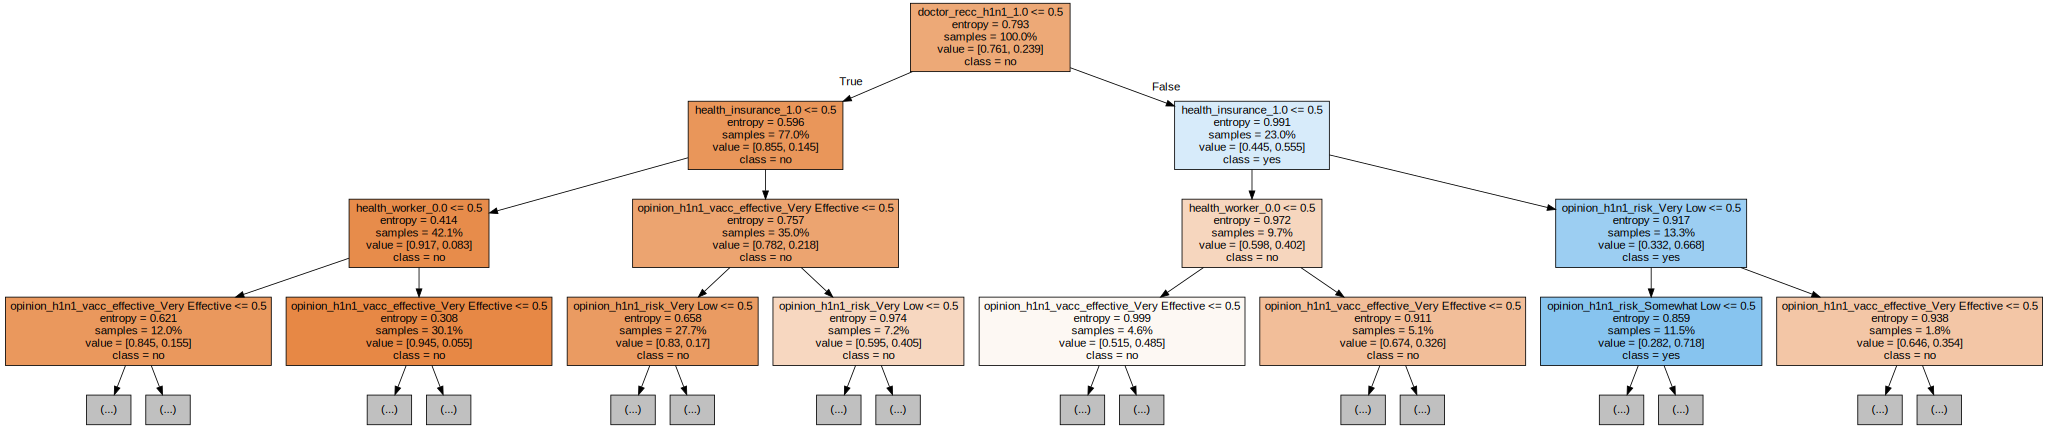

In [58]:
import graphviz
from sklearn.tree import export_graphviz

model_dt = pipe.named_steps['decisiontreeclassifier']
enc = pipe.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val).columns

dot_data = export_graphviz(model_dt
                          , max_depth=3
                          , feature_names=encoded_columns
                          , class_names=['no', 'yes']
                          , filled=True
                          , proportion=True)


display(graphviz.Source(dot_data))

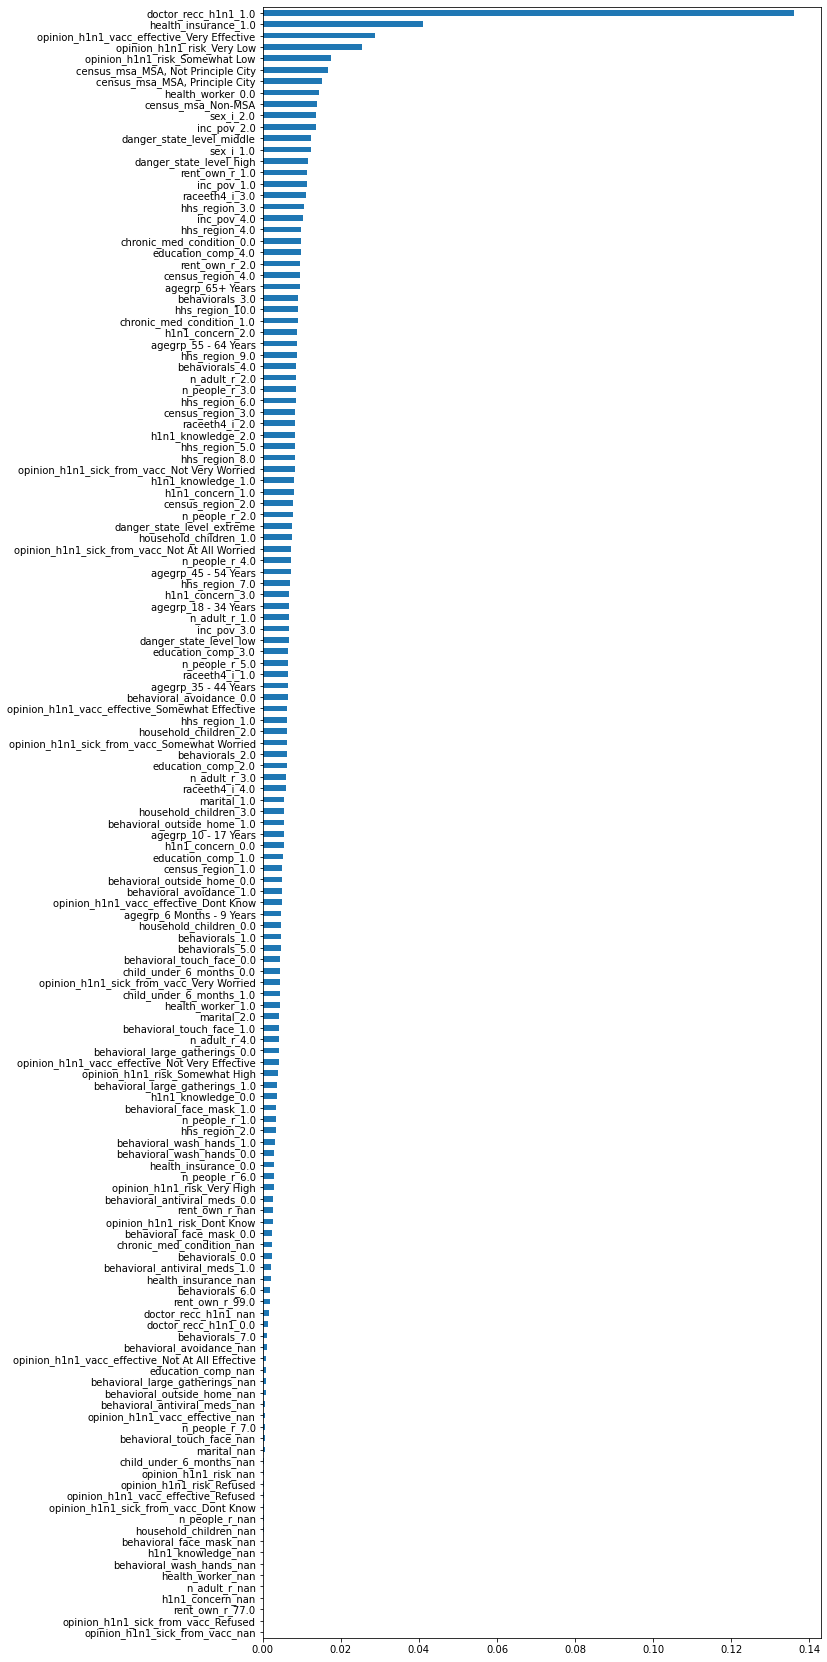

In [59]:
model_dt = pipe.named_steps['decisiontreeclassifier']

importances = pd.Series(model_dt.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh();

In [60]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(),)

pipe.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['h1n1_concern', 'h1n1_knowledge',
                                     'behavioral_antiviral_meds',
                                     'behavioral_avoidance',
                                     'behavioral_face_mask',
                                     'behavioral_wash_hands',
                                     'behavioral_large_gatherings',
                                     'behavioral_outside_home',
                                     'behavioral_touch_face',
                                     'doctor_recc_h1n1',
                                     'chronic_med_condition',
                                     'child_under_6_months', 'health_insurance',
                                     'health_worker',
                                     'opinion_h1n1_vacc_effective',
                                     'opinion_h1n1_risk',
                                     'opinion_h1n1_sick_from_vacc', 'agegrp',
                                     'education_comp', 'raceeth4_i', 'sex_i',
                                     'inc_pov', 'marital', 'rent_own_r',
                                     'census_region', 'census_msa', 'n_adult_r',
                                     'household_children', 'n_people_r',
                                     'hhs_region', ...],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer())])

In [61]:
X_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital,rent_own_r,census_region,census_msa,n_adult_r,household_children,n_people_r,hhs_region,danger_state_level,behaviorals
20365,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1,"MSA, Not Principle City",4.0,0.0,4.0,2,middle,0.0
29138,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2,Non-MSA,2.0,2.0,4.0,7,high,5.0
36128,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,2.0,1.0,4,"MSA, Not Principle City",1.0,0.0,1.0,10,middle,4.0
39793,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,2,"MSA, Principle City",2.0,0.0,2.0,7,high,3.0
32973,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2,Non-MSA,2.0,3.0,5.0,7,high,0.0


In [62]:
'''
enc = OneHotEncoder()
imp_mean = SimpleImputer()
#scaler = StandardScaler()


dt_clf = DecisionTreeClassifier()

X_train_encoded = enc.fit_transform(X_train)
X_train_imputed = imp_mean.fit_transform(X_train_encoded)
#X_train_scaled = scaler.fit_transform(X_train_imputed)
params = {
    'max_depth' : [8,12,16,20],
    'min_samples_split' : [8,12,16,20,24,28,32],
    'min_samples_leaf' : [1,2,4,8,12],
    'max_features' : [4,8,12,16,20,24]

}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring='accuracy', cv = 5, verbose=1)
grid_cv.fit(X_train_imputed, y_train)


X_val_encoded = enc.transform(X_val)
X_val_imputed = imp_mean.transform(X_val_encoded)
#X_val_scaled = scaler.transform(X_val_imputed)
'''

"\nenc = OneHotEncoder()\nimp_mean = SimpleImputer()\n#scaler = StandardScaler()\n\n\ndt_clf = DecisionTreeClassifier()\n\nX_train_encoded = enc.fit_transform(X_train)\nX_train_imputed = imp_mean.fit_transform(X_train_encoded)\n#X_train_scaled = scaler.fit_transform(X_train_imputed)\nparams = {\n    'max_depth' : [8,12,16,20],\n    'min_samples_split' : [8,12,16,20,24,28,32],\n    'min_samples_leaf' : [1,2,4,8,12],\n    'max_features' : [4,8,12,16,20,24]\n\n}\n\ngrid_cv = GridSearchCV(dt_clf, param_grid = params, scoring='accuracy', cv = 5, verbose=1)\ngrid_cv.fit(X_train_imputed, y_train)\n\n\nX_val_encoded = enc.transform(X_val)\nX_val_imputed = imp_mean.transform(X_val_encoded)\n#X_val_scaled = scaler.transform(X_val_imputed)\n"

In [63]:
#print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
#print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

#print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
#print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

#predict = dt.predict(X_val_imputed)
#f1=f1_score(y_val, predict)
#print("F1 score: {}" .format(f1))

In [64]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=12, min_samples_leaf = 4 , min_samples_split = 16, random_state=2)
)

pipe.fit(X_train, y_train)
print('훈련 정확도', pipe.score(X_train, y_train))
print('검증 정확도', pipe.score(X_val, y_val))

훈련 정확도 0.8544910002075735
검증 정확도 0.8159174475151227


In [65]:
predict = pipe.predict(X_val)
f1=f1_score(y_val, predict)

print("F1 score: {}" .format(f1))

F1 score: 0.565752658086178


In [66]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=22, min_samples_leaf = 20 , min_samples_split = 40, random_state=2)
)

pipe.fit(X_train, y_train)
print('훈련 정확도', pipe.score(X_train, y_train))
print('검증 정확도', pipe.score(X_val, y_val))

훈련 정확도 0.8432227263292115
검증 정확도 0.8174593761119677


In [67]:
predict = pipe.predict(X_val)
f1=f1_score(y_val, predict)

print("F1 score: {}" .format(f1))

F1 score: 0.5643928672516275


### 4) 테스트셋 예측 결과 제출(Submission)

- 테스트셋에 대한 예측 결과를 캐글에 제출 하세요.
- **캐글 Leaderboard의 본인 Score를 제출하세요.**
 

In [68]:
predict = pipe.predict(X_test)
#f1=f1_score(test, predict)

#print("F1 score: {}" .format(f1))

filename = pd.DataFrame(predict)

In [69]:
filename.to_csv('submission.csv')

In [70]:
from google.colab import files

In [71]:
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 4) 다른 종류의 imputer를 사용하고 특성-타겟 관계 그래프를 나타내 보세요.
- 다른 종류의 imputer를 사용해 보세요([scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html))
- seaborn plots 사용하여 관심있는 특성들과 target간의 관계를 그래프로 나타내 보세요.
- [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html)
- [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html)